## Importing necessary libraries

In [1]:
#Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
glass_data = pd.read_csv('glass.csv')
glass_data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass_data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [4]:
glass_data.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [5]:
glass_data.shape

(214, 10)

## Model Building

In [8]:
X = glass_data.drop(['Type'],axis=1)
y = glass_data['Type']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171,), (43, 9), (43,))

## Model Training | Testing | Evaluation without NORMALIZATION
### Generating a Model with K = 3

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6977


### Generating a Model with K = 5

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6279


### Generating a Model with K = 7

In [12]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6279


## Model Training | Testing | Evaluation with NORMALIZATION
### Generating a Model with K = 3

In [13]:
scaler   = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(scaled_X,y,test_size=0.20,random_state= 12,stratify=y)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((171, 9), (171,), (43, 9), (43,))

In [15]:
X_train

array([[-1.20610400e-01,  3.70875159e-01,  8.65488567e-01, ...,
        -5.26095044e-01, -3.52876828e-01,  9.56587946e-01],
       [-1.70159374e+00, -5.00618371e-01, -1.86551055e+00, ...,
        -1.42761494e+00, -3.52876828e-01, -5.86450902e-01],
       [-1.73419864e-01, -4.02421917e-01,  5.59727851e-01, ...,
        -3.28887568e-01, -3.52876828e-01, -5.86450902e-01],
       ...,
       [ 1.24253390e+00,  9.84602997e-01,  7.89048388e-01, ...,
         4.31769840e-01, -3.52876828e-01, -5.86450902e-01],
       [-3.61553581e-01,  1.58605628e+00, -1.86551055e+00, ...,
        -4.90385747e-03,  9.77617652e-01, -5.86450902e-01],
       [ 4.25267336e+00, -3.28694275e+00, -1.86551055e+00, ...,
         3.05885515e+00,  5.99721046e+00,  2.29388828e+00]])

In [16]:
X_test

array([[ 4.77197670e-02, -2.55127236e-01,  6.57015352e-01,
        -7.52670580e-01,  2.31729707e-01,  1.12106515e-01,
        -3.85232561e-01, -1.71445763e-01,  1.16232646e+00],
       [-7.51023380e-01,  1.96656754e+00, -1.86551055e+00,
         2.13830494e+00,  5.16433114e-01, -6.87074327e-01,
        -8.94213472e-02,  7.15550557e-01, -5.86450902e-01],
       [ 1.23593271e+00,  9.60053883e-01,  7.61251959e-01,
        -1.07389008e+00, -1.67060670e+00, -4.10434805e-01,
         1.28915501e-01, -3.52876828e-01,  3.21971159e+00],
       [-5.45985699e-02, -9.67051528e-01,  5.24430284e-02,
        -1.23449983e+00,  1.49995398e+00, -2.26008457e-01,
         3.26122977e-01, -3.52876828e-01,  1.47093423e+00],
       [ 1.83044019e-01,  6.40112399e-02,  7.95997495e-01,
        -3.71222421e-01, -1.30620085e-01,  1.12106515e-01,
        -5.26095044e-01, -3.52876828e-01,  8.53718690e-01],
       [ 1.12371260e+00, -2.55127236e-01,  6.91760888e-01,
        -5.92060829e-01,  1.28201195e-01,  6.599992

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7674


### Generating a Model with K = 5 

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6512


### Generating a Model with K = 7

In [19]:
knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.6279


In [20]:
# How to pick up optimum no of k?
neighbours = list(range(1,50,2))
cv_scores = []

for i in neighbours:
    #print(i)
    knn_model = KNeighborsClassifier(n_neighbors = i)
    cv_score = cross_val_score(estimator = knn_model,X=scaled_X,y=y,cv=10)
    #print(i,'-',cv_score.mean())
    cv_scores.append(cv_score.mean())

In [21]:
cv_scores

[0.6582251082251082,
 0.691125541125541,
 0.6632034632034632,
 0.6257575757575757,
 0.620995670995671,
 0.6162337662337661,
 0.6023809523809524,
 0.5928571428571429,
 0.5837662337662338,
 0.5932900432900434,
 0.5844155844155845,
 0.5655844155844155,
 0.5796536796536796,
 0.583982683982684,
 0.5794372294372295,
 0.5701298701298702,
 0.5608225108225107,
 0.5885281385281386,
 0.5837662337662337,
 0.579004329004329,
 0.5841991341991342,
 0.5837662337662336,
 0.5837662337662338,
 0.5701298701298702,
 0.5517316017316017]

In [22]:
neighbours[cv_scores.index(max(cv_scores))]

3

## Vizualizing the K neighbours wrt CV

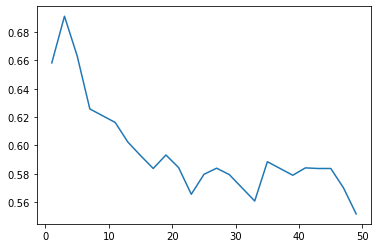

In [23]:
plt.plot(neighbours,cv_scores)

## Rebuild the Model by choosing 3 as the neighrest neighbour

In [24]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
print("Accuracy score: ", round(accuracy_score(y_test,y_pred),4))

Accuracy score:  0.7674
